In [22]:
#Könyvtár behívása
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Adathalmaz beolvasása
root = r"bank+marketing\bank\bank-full.csv"
ah = pd.read_csv(root, sep=';')

In [24]:
# Hiányzó értékek vizsgálata
print("Hiányzó értékek:")
print(ah.isnull().sum())
print(f"\nHiányzó értékek aránya: {ah.isnull().sum().sum() / (ah.shape[0] * ah.shape[1]) * 100:.2f}%")

# Duplikátumok ellenőrzése
print(f"\nDuplikált sorok száma: {ah.duplicated().sum()}")

# Adattípusok áttekintése
print("\nAdattípusok:")
print(ah.dtypes)

Hiányzó értékek:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Hiányzó értékek aránya: 0.00%

Duplikált sorok száma: 0

Adattípusok:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


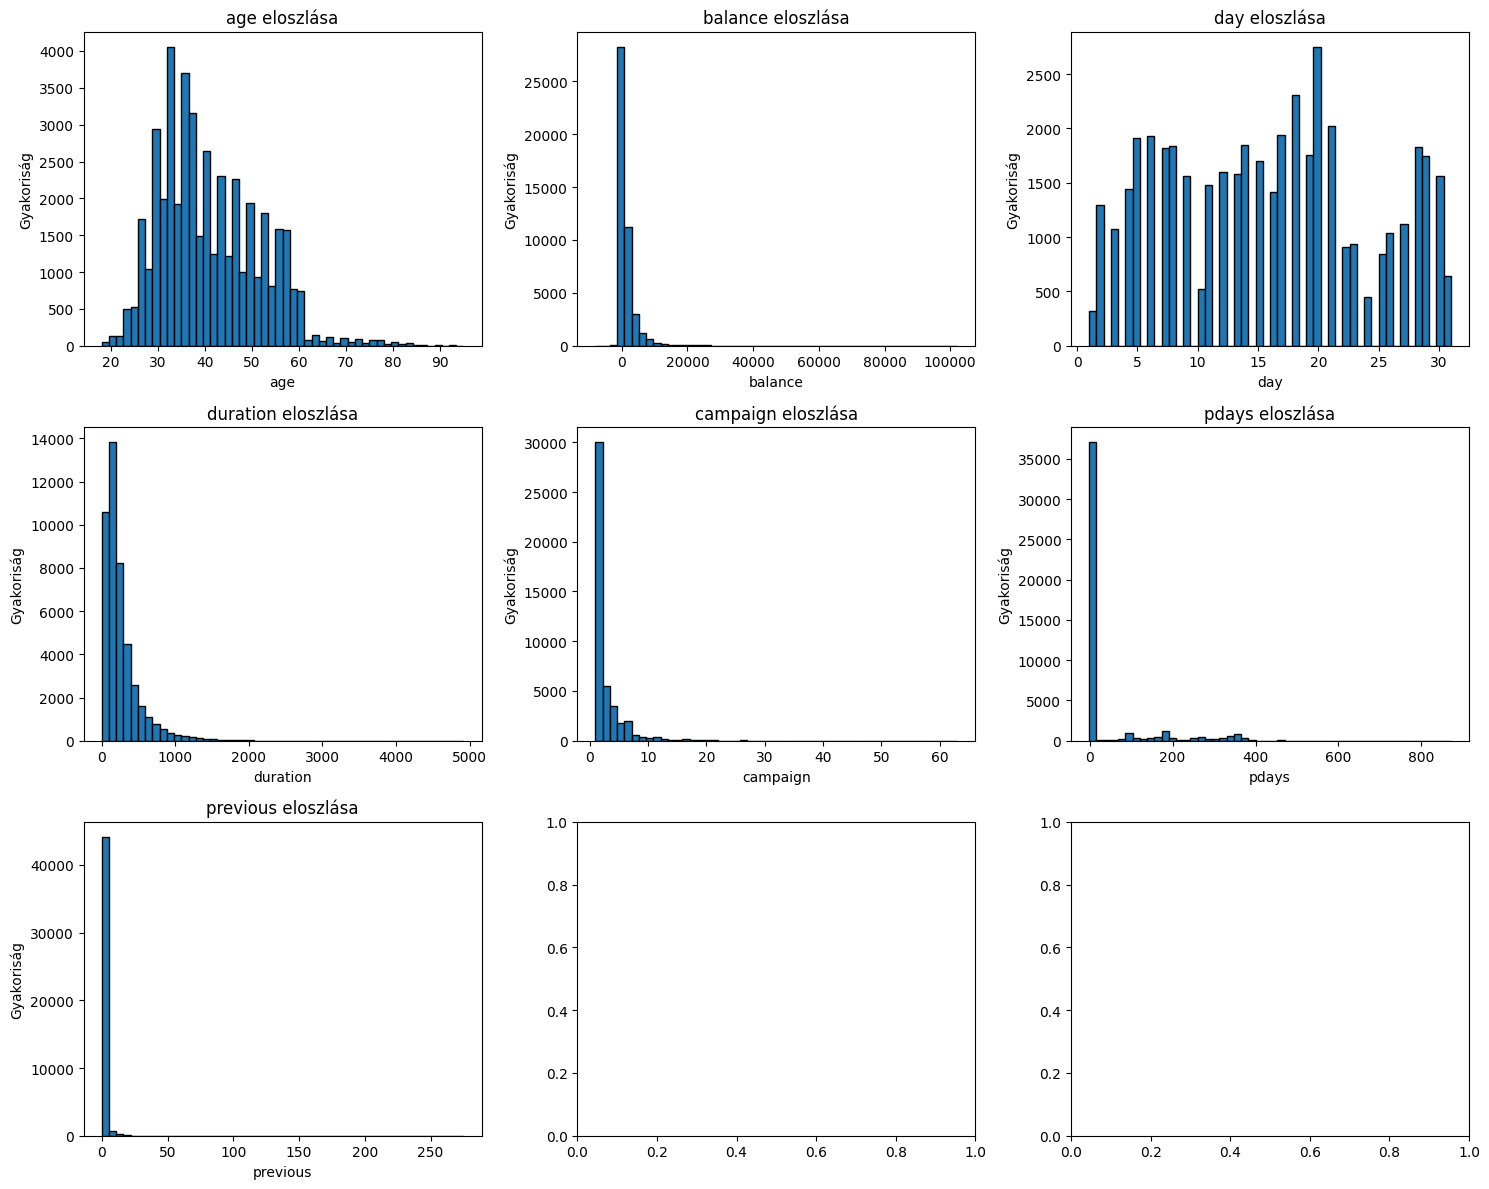

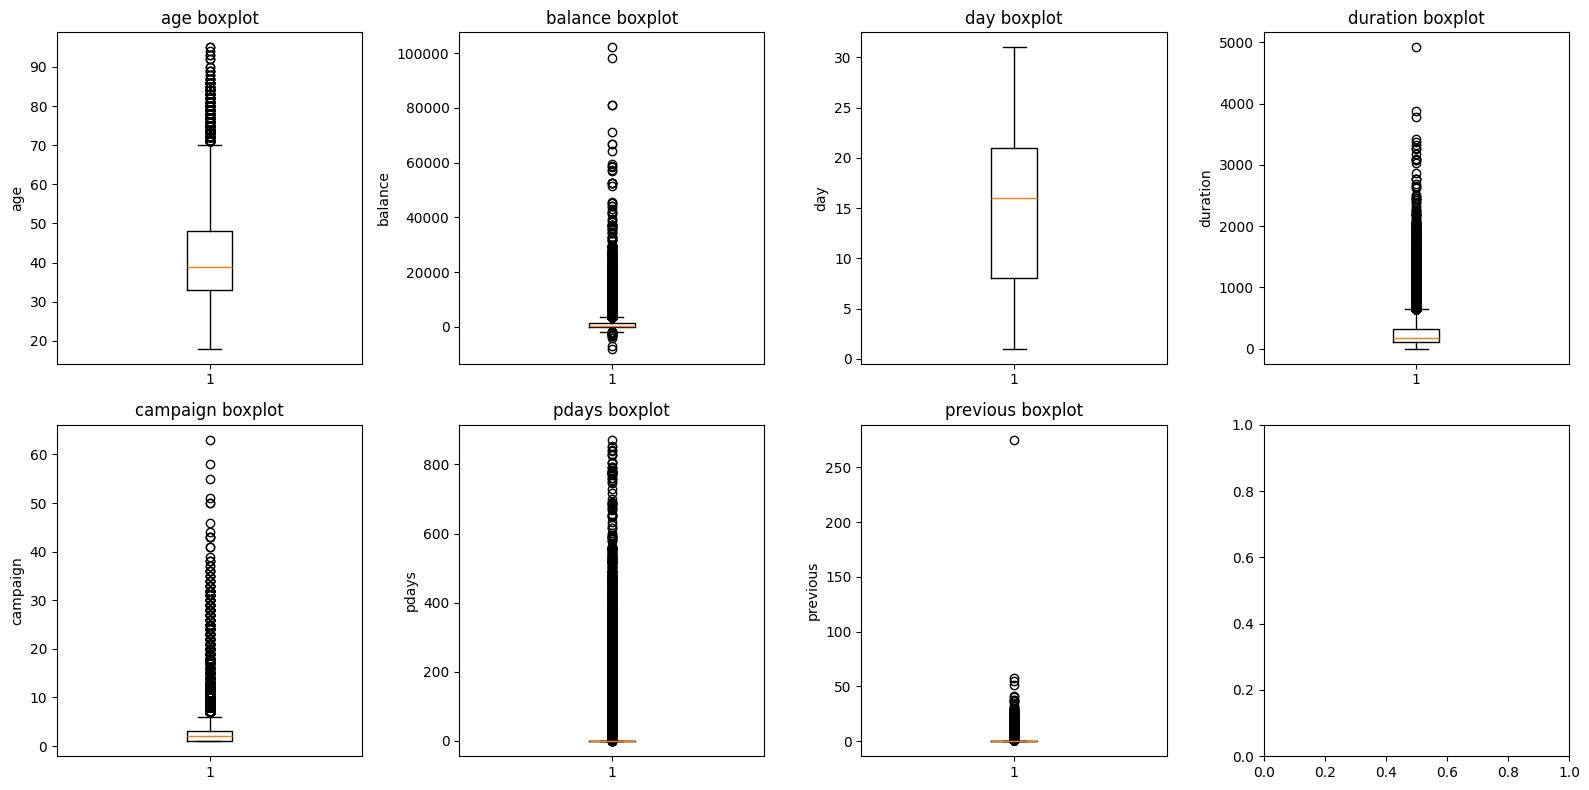

In [ ]:
# Numerikus (int64) változók listája
numerikus_valtozok = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Eloszlások vizualizációja
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerikus_valtozok):
    axes[idx].hist(ah[col], bins=50, edgecolor='black')
    axes[idx].set_title(f'{col} eloszlása')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Gyakoriság')

plt.tight_layout()
plt.show()

# Boxplot a kiugró értékek vizsgálatára
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(numerikus_valtozok):
    axes[idx].boxplot(ah[col])
    axes[idx].set_title(f'{col} boxplot')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

In [26]:
# IQR módszer a kiugró értékek azonosítására
def outlier_detection(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("Kiugró értékek száma változónként:")
for col in numerikus_valtozok:
    count, lower, upper = outlier_detection(ah, col)
    print(f"{col}: {count} kiugró érték ({count/len(ah)*100:.2f}%), tartomány: [{lower:.2f}, {upper:.2f}]")

Kiugró értékek száma változónként:
age: 487 kiugró érték (1.08%), tartomány: [10.50, 70.50]
balance: 4729 kiugró érték (10.46%), tartomány: [-1962.00, 3462.00]
day: 0 kiugró érték (0.00%), tartomány: [-11.50, 40.50]
duration: 3235 kiugró érték (7.16%), tartomány: [-221.00, 643.00]
campaign: 3064 kiugró érték (6.78%), tartomány: [-2.00, 6.00]
pdays: 8257 kiugró érték (18.26%), tartomány: [-1.00, -1.00]
previous: 8257 kiugró érték (18.26%), tartomány: [0.00, 0.00]



job eloszlása:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
Egyedi értékek száma: 12

marital eloszlása:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
Egyedi értékek száma: 3

education eloszlása:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
Egyedi értékek száma: 4

default eloszlása:
default
no     44396
yes      815
Name: count, dtype: int64
Egyedi értékek száma: 2

housing eloszlása:
housing
yes    25130
no     20081
Name: count, dtype: int64
Egyedi értékek száma: 2

loan eloszlása:
loan
no     37967
yes     7244
Name: count, dtype: int64
Egyedi értékek száma: 2

contact eloszlása:
contact
cellular     29285
unknown      13020
tel

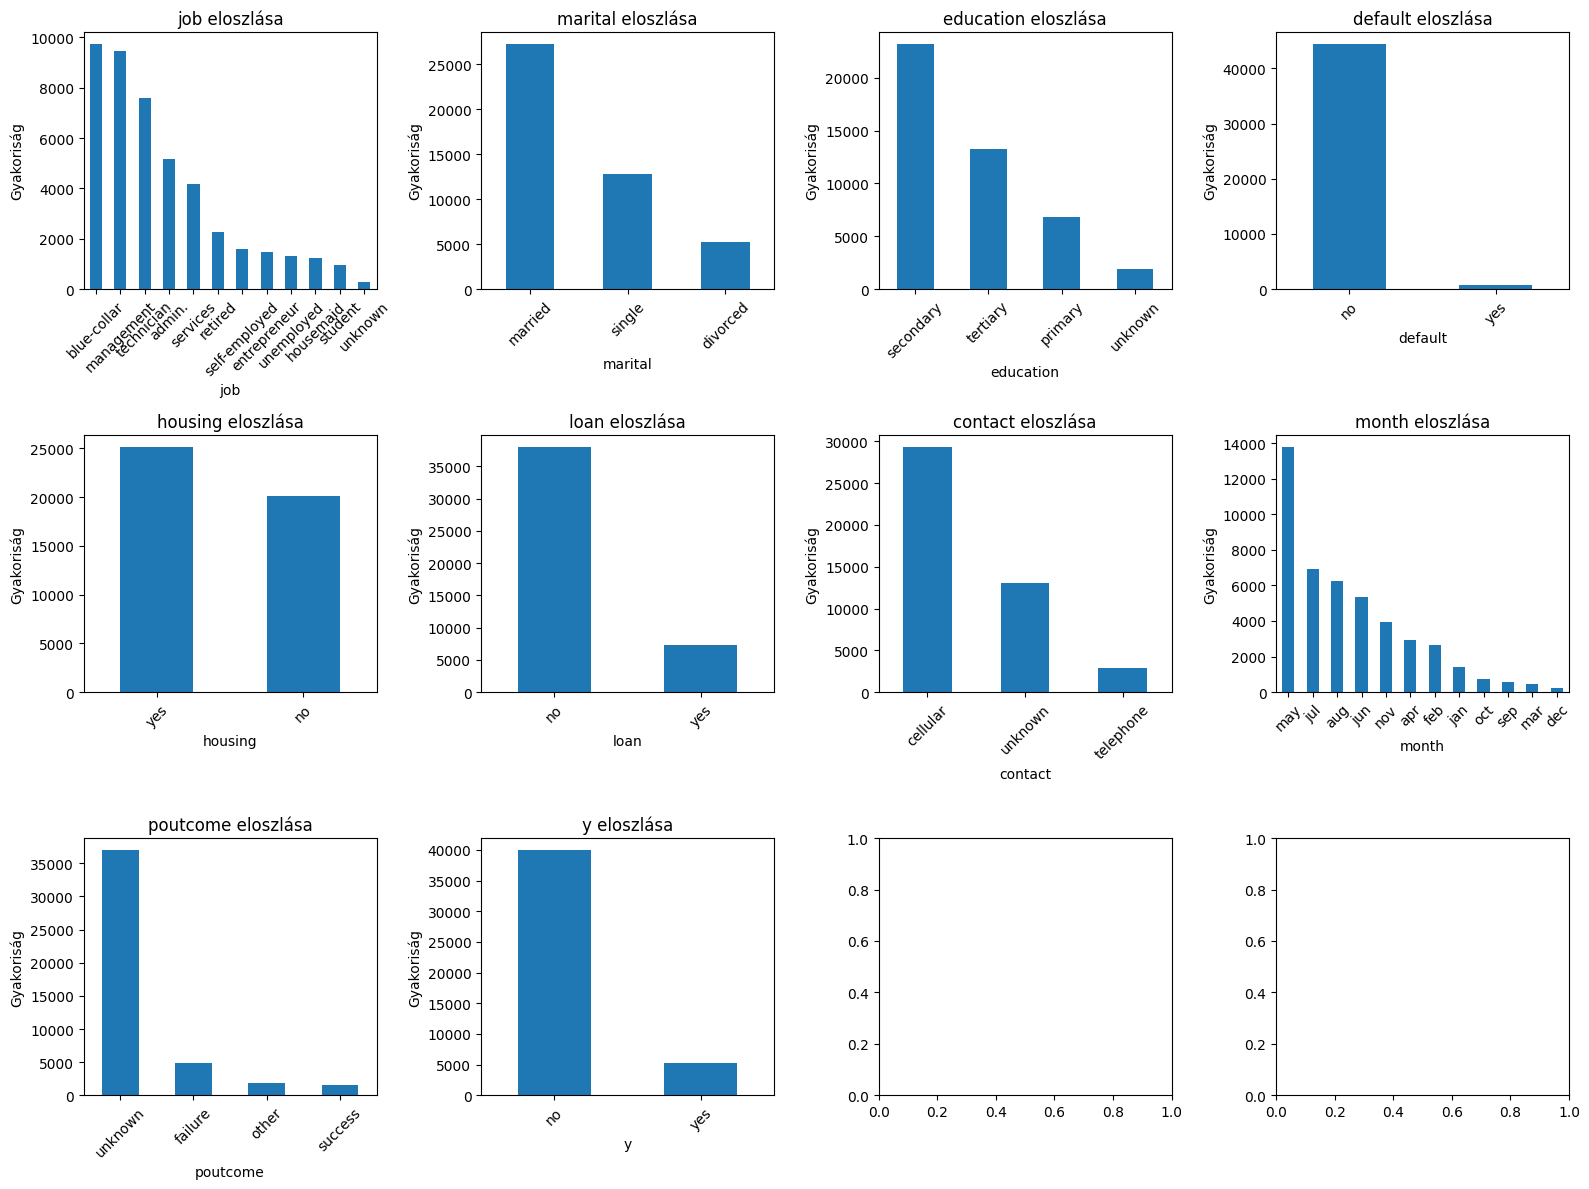

In [ ]:
# Összes kategorikus (object) változó eloszlása
kategorikus_valtozok = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in kategorikus_valtozok:
    print(f"\n{col} eloszlása:")
    print(ah[col].value_counts())
    print(f"Egyedi értékek száma: {ah[col].nunique()}")

# Vizualizáció
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(kategorikus_valtozok):
    ah[col].value_counts().plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'{col} eloszlása')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Gyakoriság')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

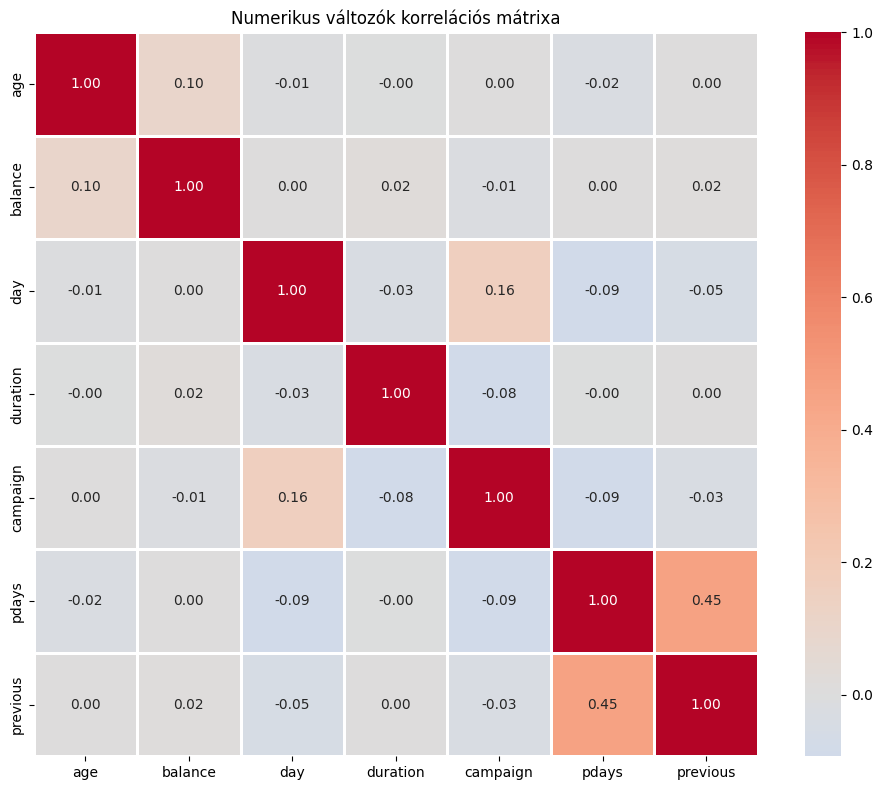


Erős korrelációk (|r| > 0.5):


In [28]:
# Korrelációs mátrix
correlation_matrix = ah[numerikus_valtozok].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Numerikus változók korrelációs mátrixa')
plt.tight_layout()
plt.show()

# Erős korrelációk kiemelése (|r| > 0.5)
print("\nErős korrelációk (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

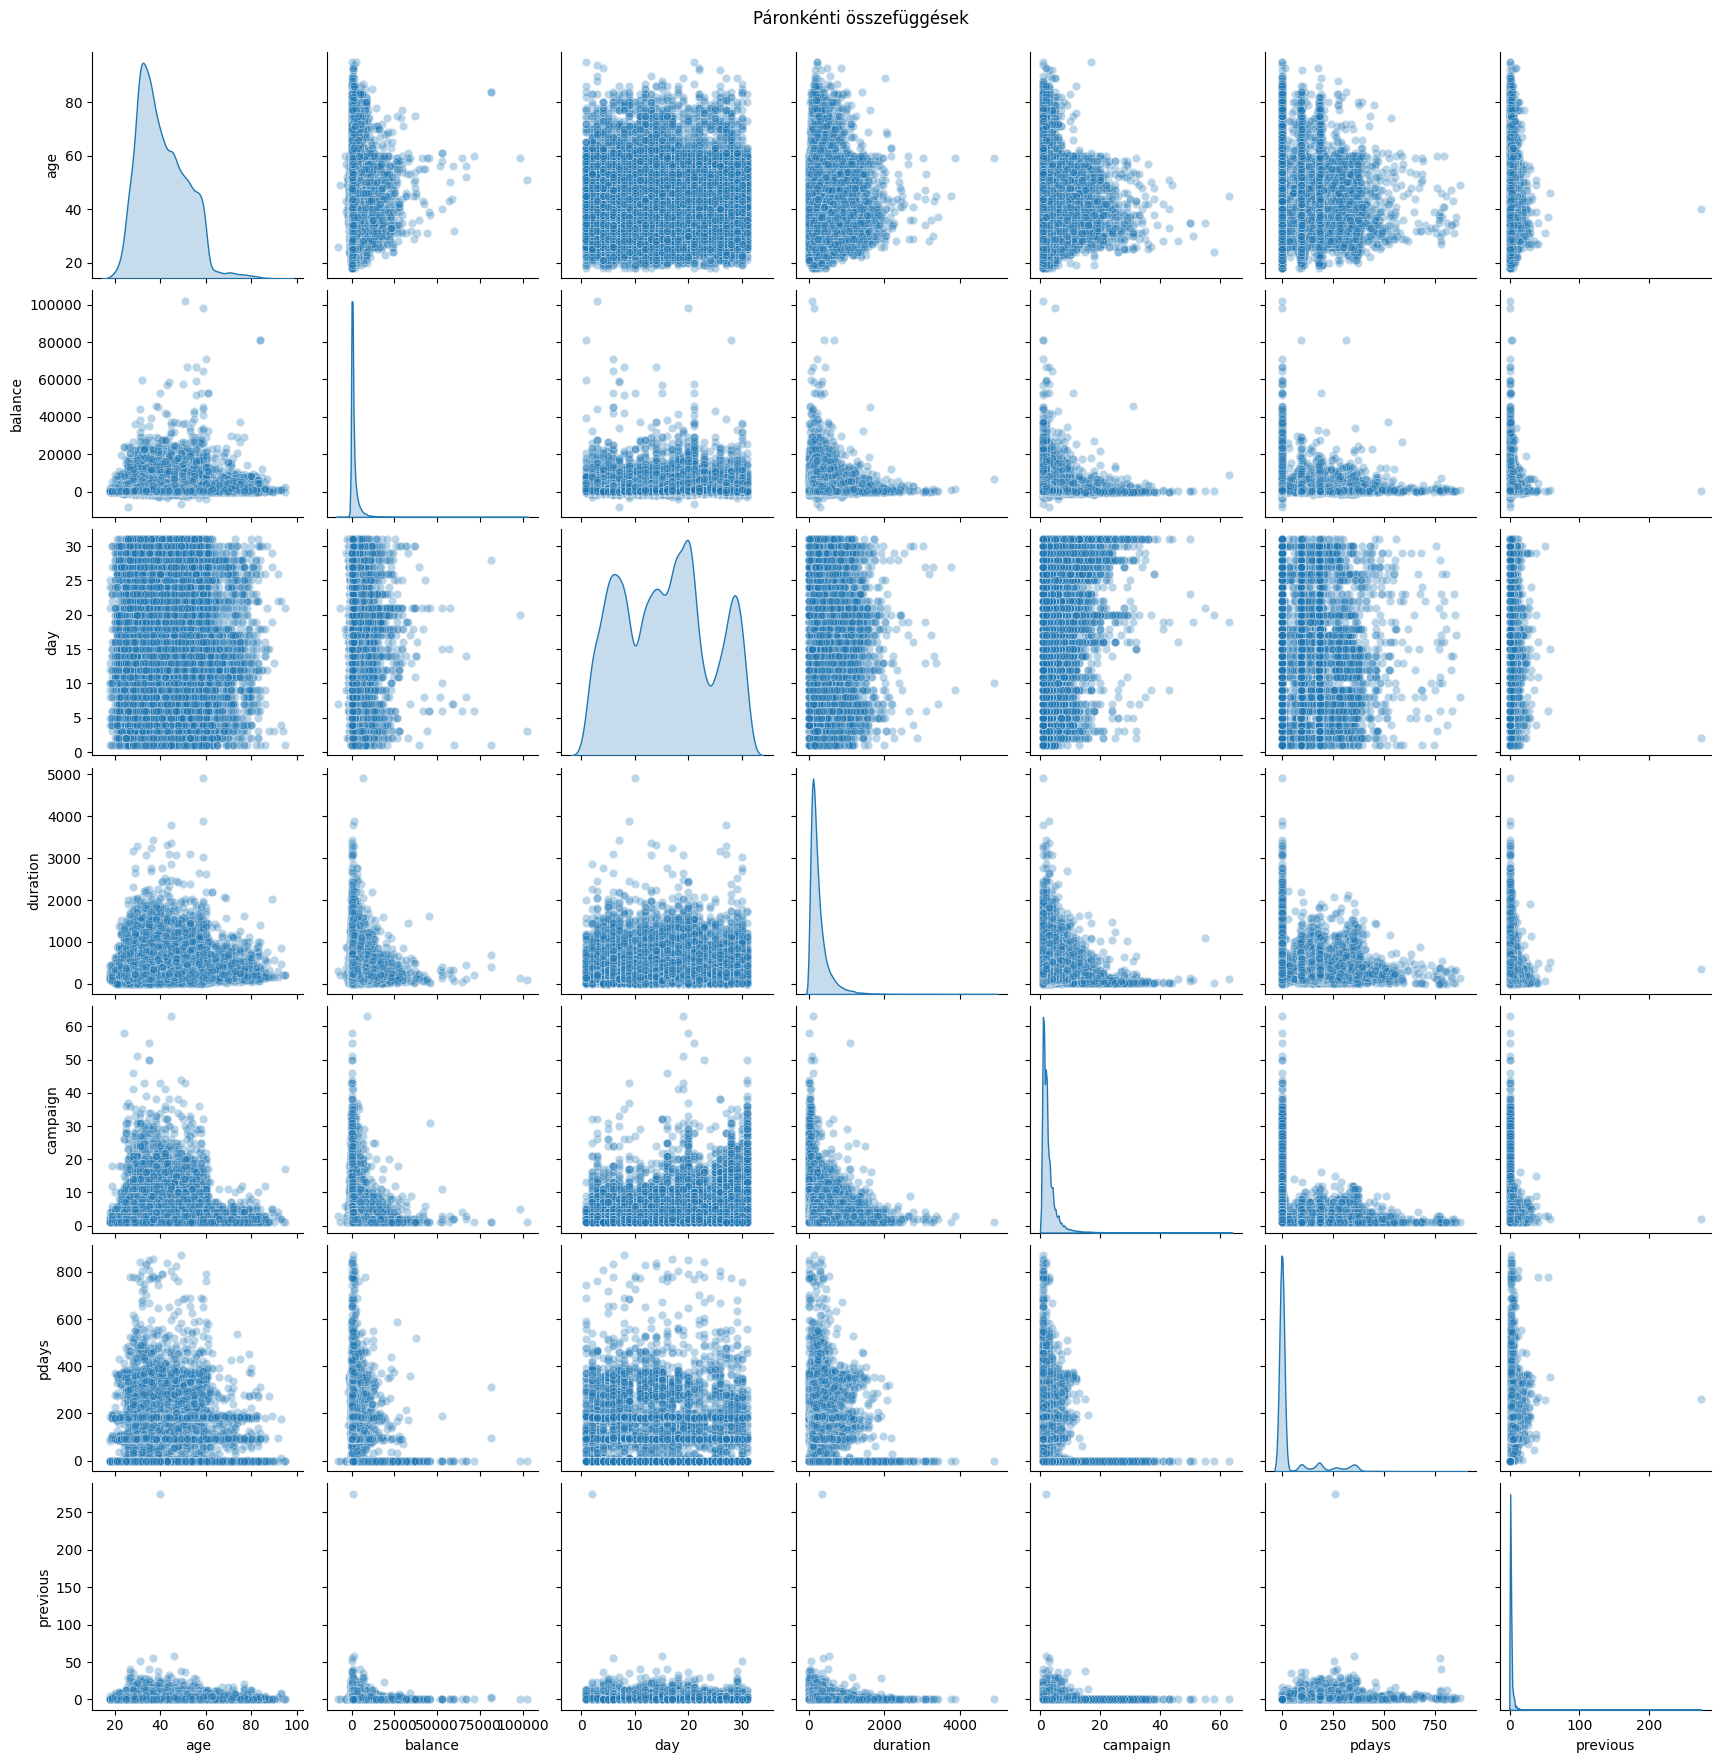

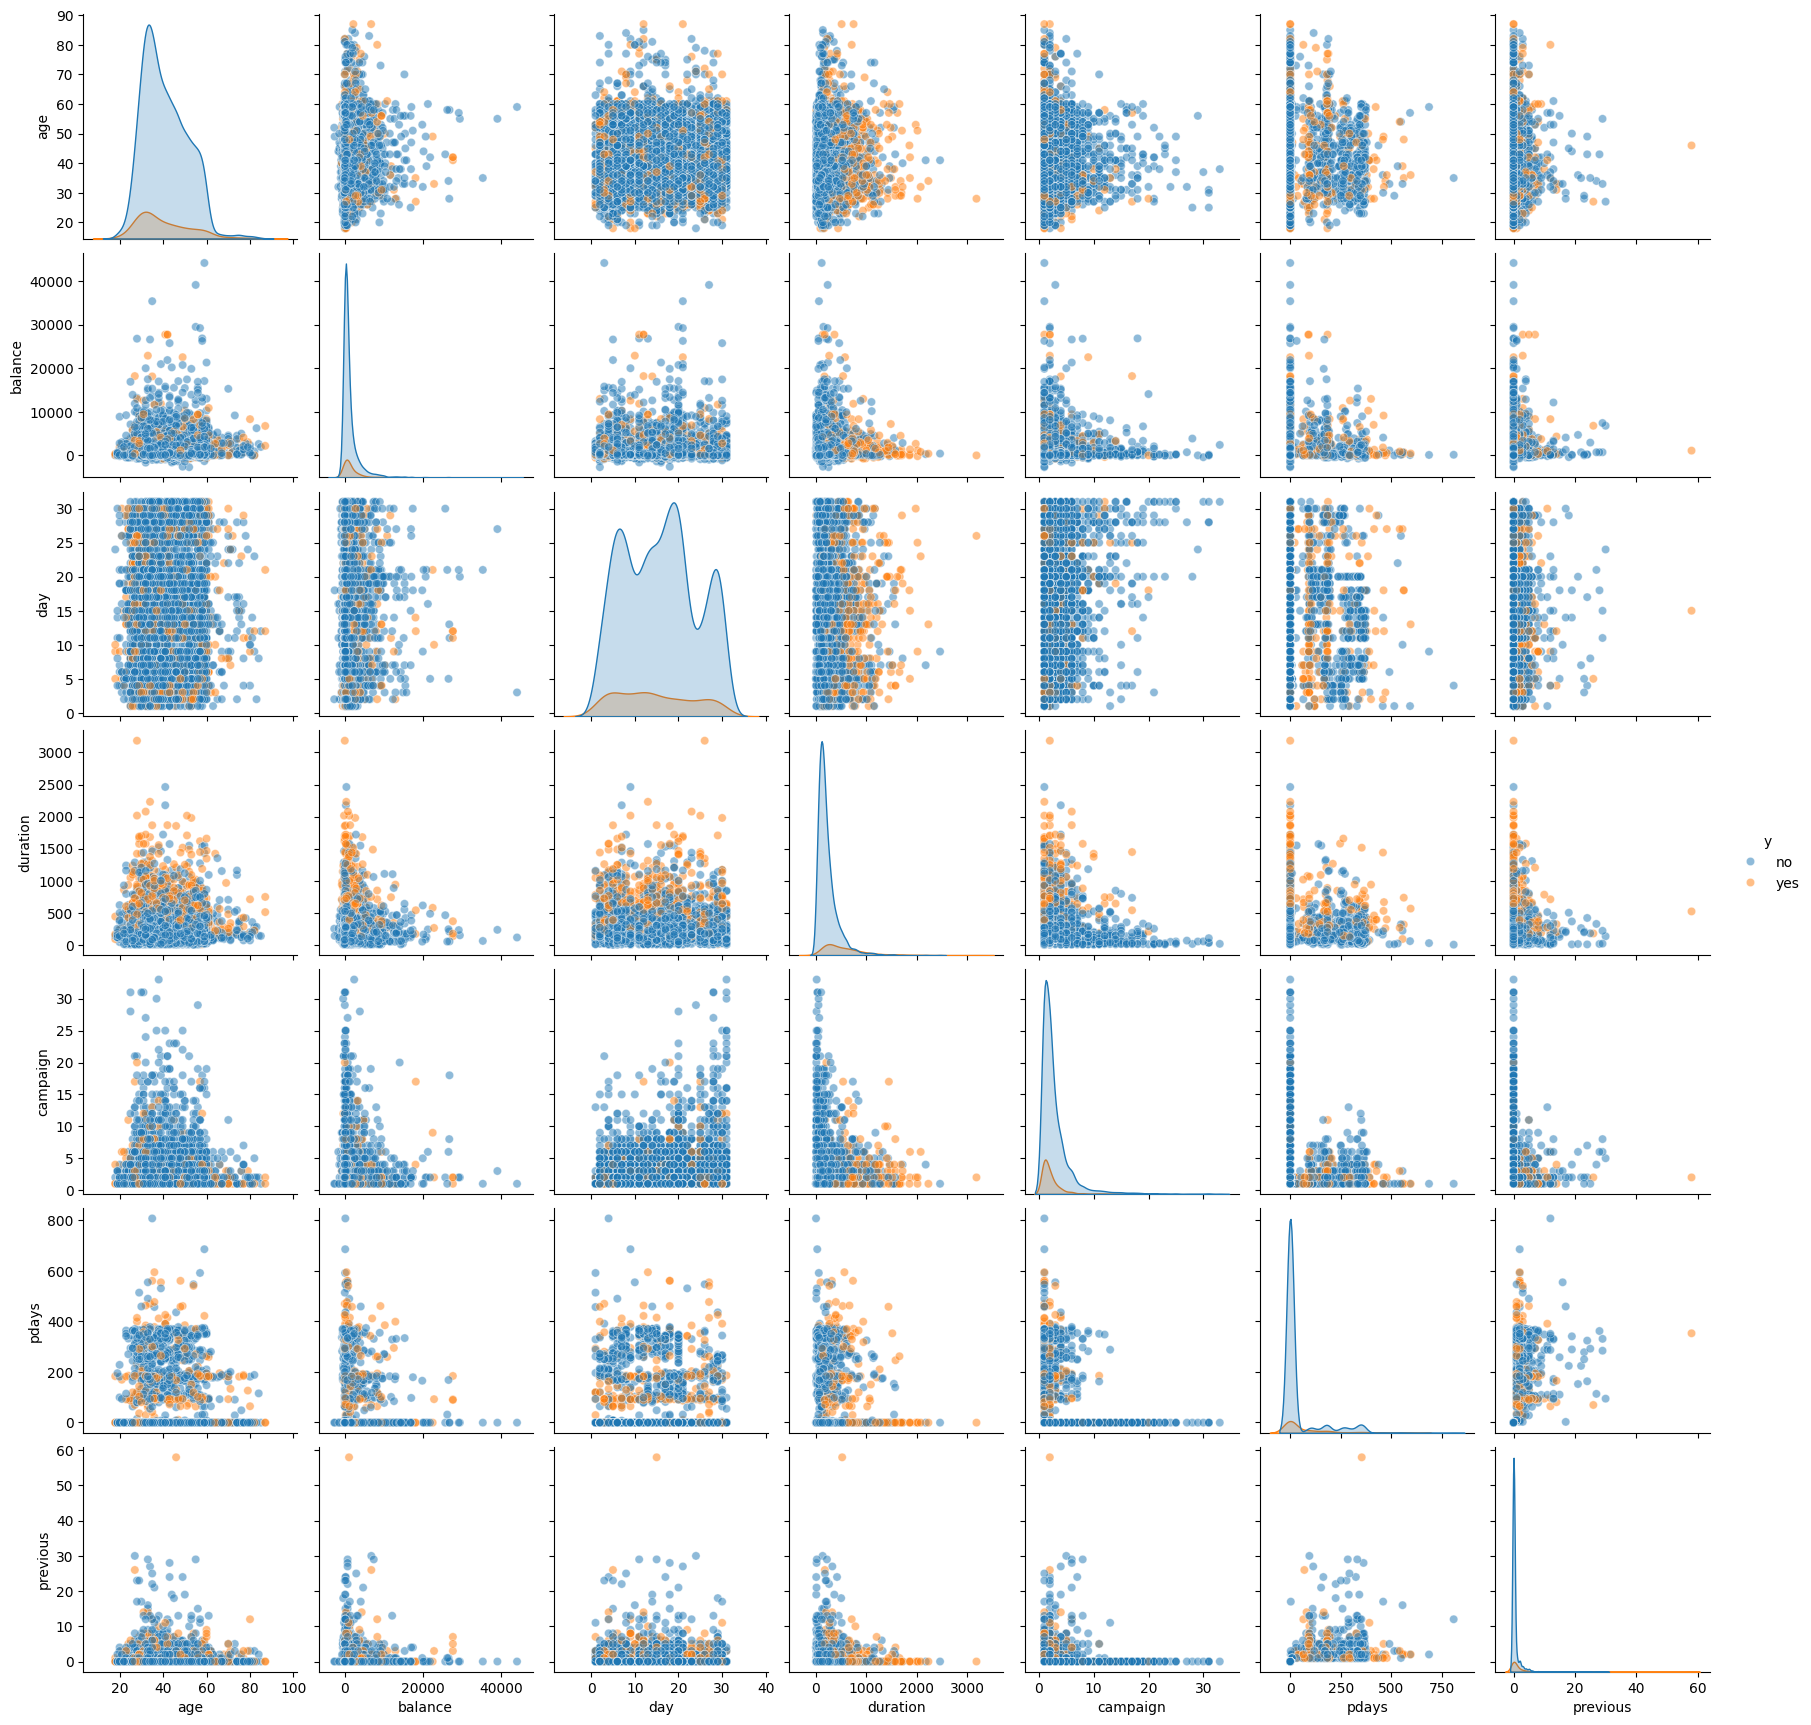

In [29]:
# Páronkénti scatter plotok
sns.pairplot(ah[numerikus_valtozok], diag_kind='kde', plot_kws={'alpha': 0.3})
plt.suptitle('Páronkénti összefüggések', y=1.01)
plt.show()

# Célváltozó szerinti bontás (ha releváns)
ah_sample = ah.sample(n=5000, random_state=42)  # Mintavétel a gyorsabb futásért
sns.pairplot(ah_sample[numerikus_valtozok + ['y']], hue='y', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

In [30]:
# Változók tartományának összehasonlítása
print("Változók statisztikái (skálázás előtt):")
print(ah[numerikus_valtozok].describe())

# Coefficient of Variation (variációs együttható)
print("\nVariációs együtthatók:")
for col in numerikus_valtozok:
    cv = (ah[col].std() / ah[col].mean()) * 100
    print(f"{col}: {cv:.2f}%")

Változók statisztikái (skálázás előtt):
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000    

In [31]:
# Új változók létrehozása (ha szükséges)
# Példa: életkor kategóriák
ah['age_group'] = pd.cut(ah['age'], bins=[0, 30, 40, 50, 60, 100], 
                         labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Balance kategóriák (VIP, közép, alacsony egyenleg)
ah['balance_category'] = pd.cut(ah['balance'], 
                                bins=[-float('inf'), 0, 1000, 5000, float('inf')],
                                labels=['Negatív', 'Alacsony', 'Közepes', 'Magas'])

print("\nÚj kategorikus változók eloszlása:")
print(ah['age_group'].value_counts())
print(ah['balance_category'].value_counts())


Új kategorikus változók eloszlása:
age_group
31-40    17687
41-50    11239
51-60     8067
18-30     7030
60+       1188
Name: count, dtype: int64
balance_category
Alacsony    23300
Közepes     11786
Negatív      7280
Magas        2845
Name: count, dtype: int64


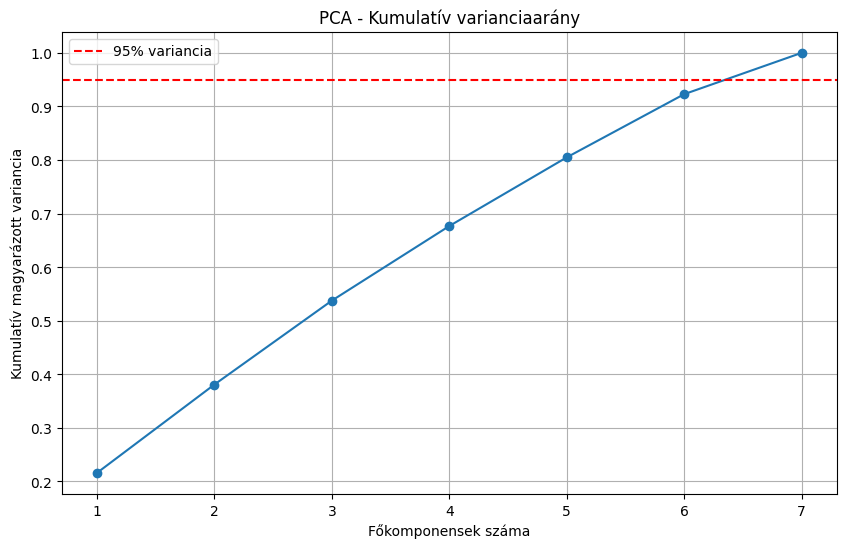

Főkomponensek által magyarázott variancia:
PC1: 0.2156 (21.56%)
PC2: 0.1650 (16.50%)
PC3: 0.1567 (15.67%)
PC4: 0.1393 (13.93%)
PC5: 0.1282 (12.82%)
PC6: 0.1180 (11.80%)
PC7: 0.0772 (7.72%)


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizálás
scaler = StandardScaler()
ah_scaled = scaler.fit_transform(ah[numerikus_valtozok])

# PCA a varianciaarány megértéséhez
pca = PCA()
pca.fit(ah_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Főkomponensek száma')
plt.ylabel('Kumulatív magyarázott variancia')
plt.title('PCA - Kumulatív varianciaarány')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variancia')
plt.legend()
plt.show()

print("Főkomponensek által magyarázott variancia:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

10. Mintavétel stratégia

In [33]:
# Ha az adathalmaz túl nagy lenne bizonyos algoritmusokhoz
from sklearn.model_selection import train_test_split

# Reprezentatív minta készítése
ah_sample, _ = train_test_split(ah, test_size=0.5, random_state=42, stratify=ah['y'])
print(f"Eredeti adathalmaz mérete: {len(ah)}")
print(f"Minta mérete: {len(ah_sample)}")

Eredeti adathalmaz mérete: 45211
Minta mérete: 22605


In [34]:
#Egyszerű elemzés
print(f"Sorok: {len(ah)}")
print(f"Változók (oszlopok száma): {len(ah.columns)}")
print(ah.head())
print(ah.describe())
print(ah['job'].value_counts())
print(ah['balance'].describe())

Sorok: 45211
Változók (oszlopok száma): 19
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  unknown    5   may       261         1     -1         0  unknown  no   
1  unknown    5   may       151         1     -1         0  unknown  no   
2  unknown    5   may        76         1     -1         0  unknown  no   
3  unknown    5   may        92         1     -1         0  unknown  no   
4  unknown    5   may       198         1     -1         0  unknown  no   

  age_group balance_category  
0     51-60          Közepes  